Glen Langston's Astropy test of the FITS cube tutorial


First run python commands with already install code

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import astropy.units as u
from astropy.utils.data import download_file
from astropy.io import fits  # We use fits to open the actual data file

from astropy.utils import data
data.conf.remote_timeout = 60
import radio_beam


Upload the Bonn HI4PI cube with 1.5degree resolution

In [17]:
# This notebook assumes you've already downloaded sky image
filename = "hi4pi_1.5deg.fits"
fullpath = "ftp://ftp.mpifr-bonn.mpg.de/outgoing/bwinkel/" + filename
#!wget {fullpath}

    

In [19]:
from spectral_cube import SpectralCube

from astroquery.esasky import ESASky
from astroquery.utils import TableList
from astropy.wcs import WCS
from reproject import reproject_interp

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [20]:
# Print the current working directory
!pwd

/Users/glangsto/Research/hi4pi


In [21]:
allsky = "./" + filename
hi_data = fits.open(allsky)  # Open the FITS file for reading
cube = SpectralCube.read(hi_data)  # Initiate a SpectralCubecube = SpectralCube.read(hi_data)  # Initiate a SpectralCube
allsky = SpectralCube.read(hi_data)  # Initiate a SpectralCube
hi_data.close()  # Close the FITS file - we already read it in and don't need it anymore!

In [22]:
print(cube)

SpectralCube with shape=(343, 363, 723) and unit=K:
 n_x:    723  type_x: GLON-CAR  unit_x: deg    range:          nan deg:         nan deg
 n_y:    363  type_y: GLAT-CAR  unit_y: deg    range:          nan deg:         nan deg
 n_s:    343  type_s: VRAD      unit_s: m / s  range:  -220183.802 m / s:  220385.717 m / s


Now take a look at one velocity channel of the cube

INFO: Auto-setting vmin to -9.012e+00 [aplpy.core]
INFO: Auto-setting vmax to  1.053e+02 [aplpy.core]


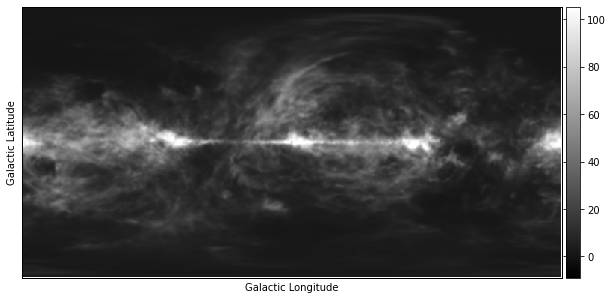

In [23]:
cube[170, :, :].quicklook()  # Slice the cube along the spectral axis, and display a quick image

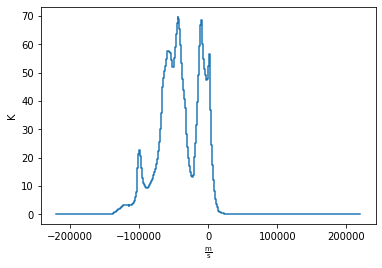

In [24]:
cube[:, 181, 110].quicklook()  # Extract a single spectrum through the data cube

# Congratulations you've read and displayed a full sky image of our Milky Way Galaxy!